# Визуализация данных. Matplotlib

# Несколько областей рисования с помощью Matplotlib

Зачастую необходимо расположить несколько областей на одном графике. Для этого надо создать несколько областей рисования и работать с каждой в отдельности. В следующем примере мы нарисуем график функции $x^2(2+\sin(1/x))$ и добавим еще одну область рисования для самой интересной части графика

Ожидаем следующий результат:

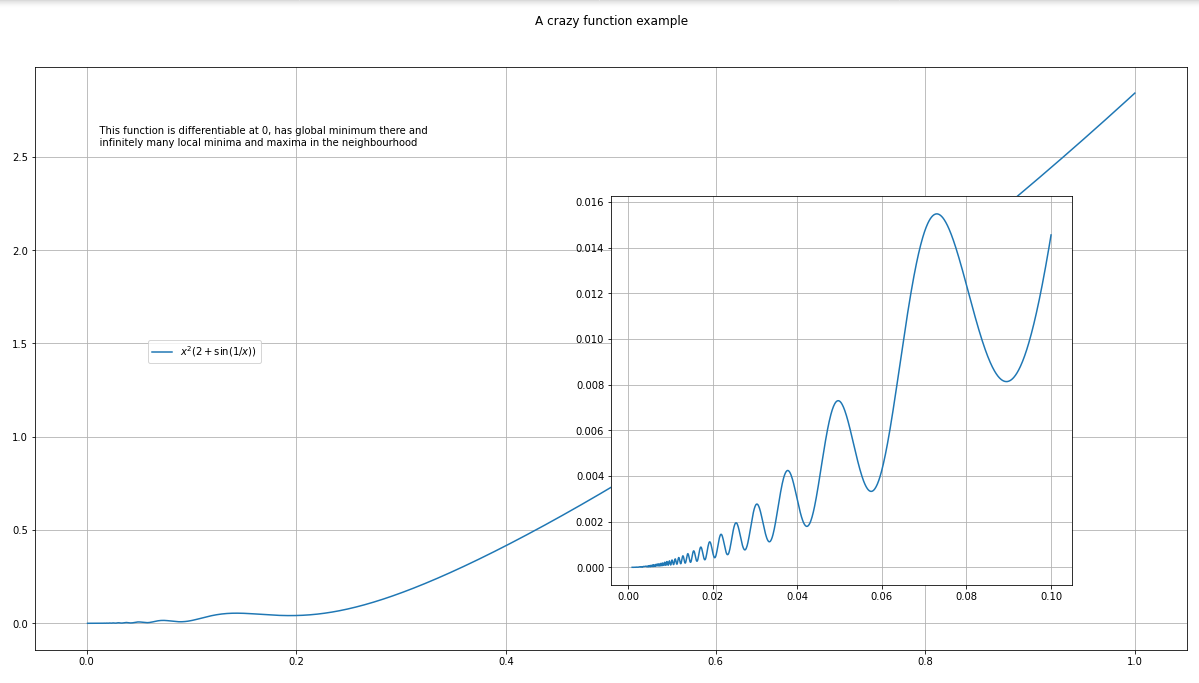

In [2]:
import matplotlib.pyplot as plt
import numpy as np

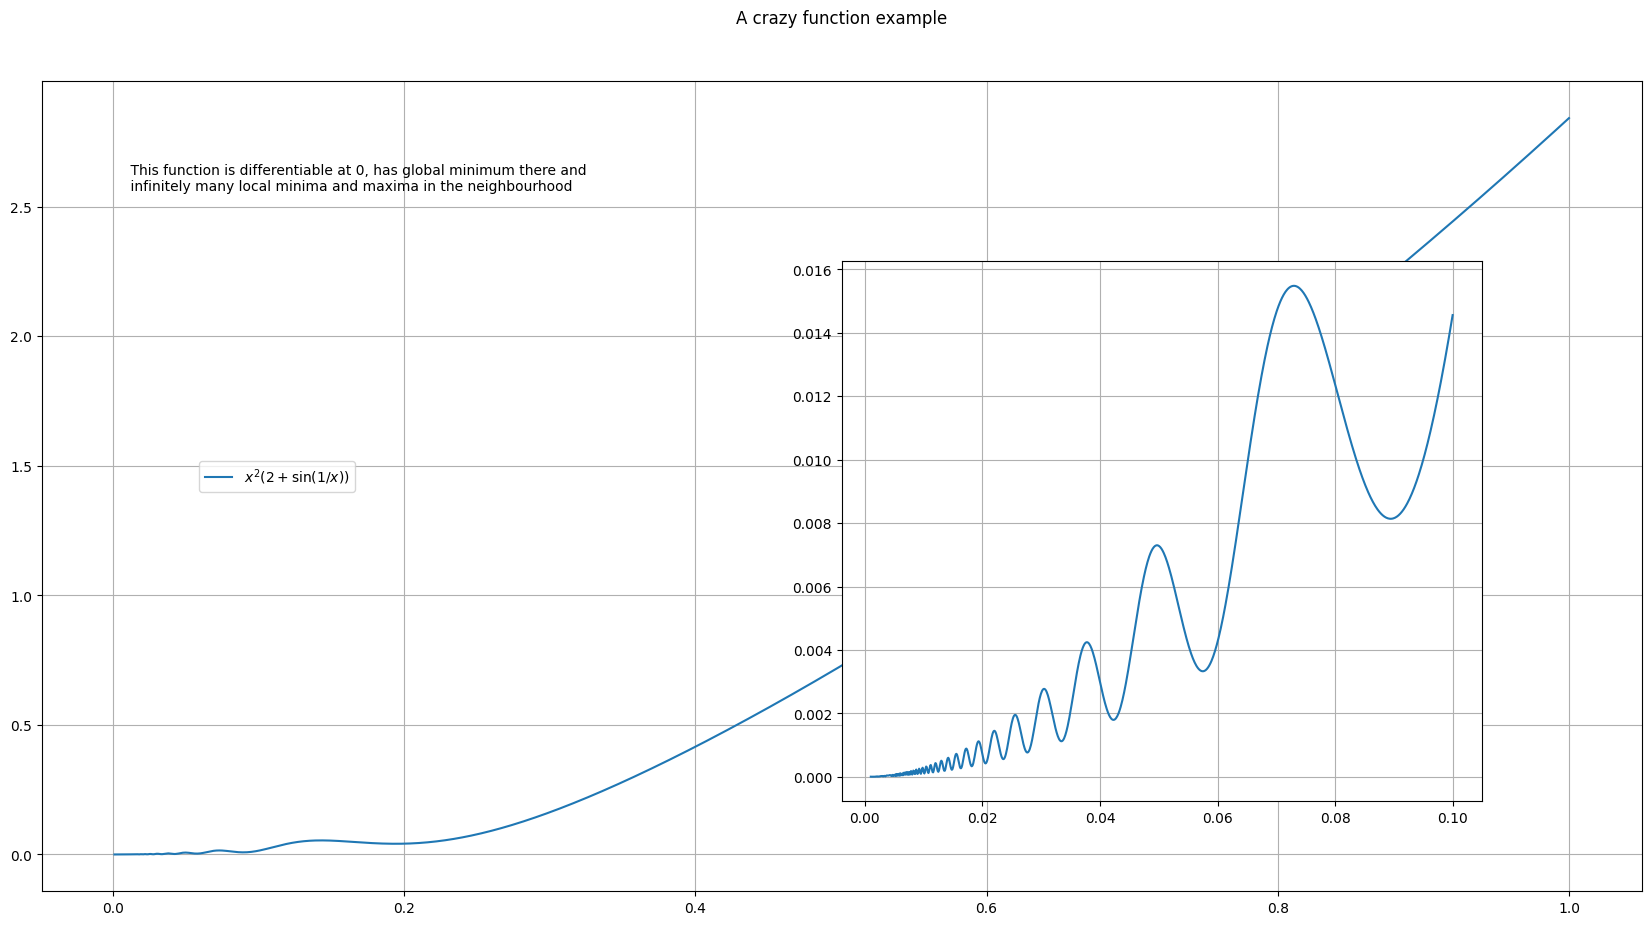

In [3]:
def crazy_func(x):
    return x * x * (2 + np.sin(1 / x))

fig = plt.figure(figsize=(16, 9))

fig.suptitle('A crazy function example')

# Нарисуем основной график
big_ax = fig.add_axes([0, 0, 1, 0.9])
big_ax.plot(
    np.linspace(0.001, 1, 1000),
    np.apply_along_axis(crazy_func, 0, np.linspace(0.001, 1, 1000)),
    label='$x^2(2+\sin(1/x))$'
)

big_ax.text(
    0, 2.5,
    '''
    This function is differentiable at 0, has global minimum there and
    infinitely many local minima and maxima in the neighbourhood
    '''
)

big_ax.legend(bbox_to_anchor=(0.2, 0.54))
big_ax.grid(True)

# Нарисуем вспомогательный график
small_ax = fig.add_axes([0.5, 0.1, 0.4, 0.6])
small_ax.plot(
    np.linspace(0.001, 0.1, 1000),
    np.apply_along_axis(crazy_func, 0, np.linspace(0.001, 0.1, 1000))
)
small_ax.grid(True)


plt.show()
#del crazy_func, fig, big_ax, small_ax

## Мультиокна

В предыдущем примере мы создали две области рисования, но их расположение пришлось задавать явно с помощью координат. В большинстве случаев такой точный уровень настройки не нужен. Для этого в matplotlib существуют мультиокна. Во многом они похожи на области рисования. Создавать их можно из объекта Figure с помощью метода add_subplots.

При использовании метода add_subplots рисунок разбивается как таблица на некоторое число строк и столбцов. Возникающие ячейки нигде не рисуются - это удобная абстракция. Далее можно выбрать одну из этих ячеек, и рисовать в ней. Чтобы сделать это надо в функцию subplots передать три числа или трехзначное число. Первая цифра указывает количество строк, вторая - столбцов, третья - порядковый номер ячейки в которой вы хотите рисовать (нумерация начинается с 1 идет слева направо и сверху вниз). Например, вызов fig.add_subplots(3, 3, 7) разобъет рисунок на 9 равных частей и вернет вам ячейку из нижнего левого угла.

Преимущество подхода в том, что вы получаете области рисования одинакового размера не задумываясь о том какие должны быть у них координаты.

[Фигуры Лиссажу](https://ru.wikipedia.org/wiki/%D0%A4%D0%B8%D0%B3%D1%83%D1%80%D1%8B_%D0%9B%D0%B8%D1%81%D1%81%D0%B0%D0%B6%D1%83)

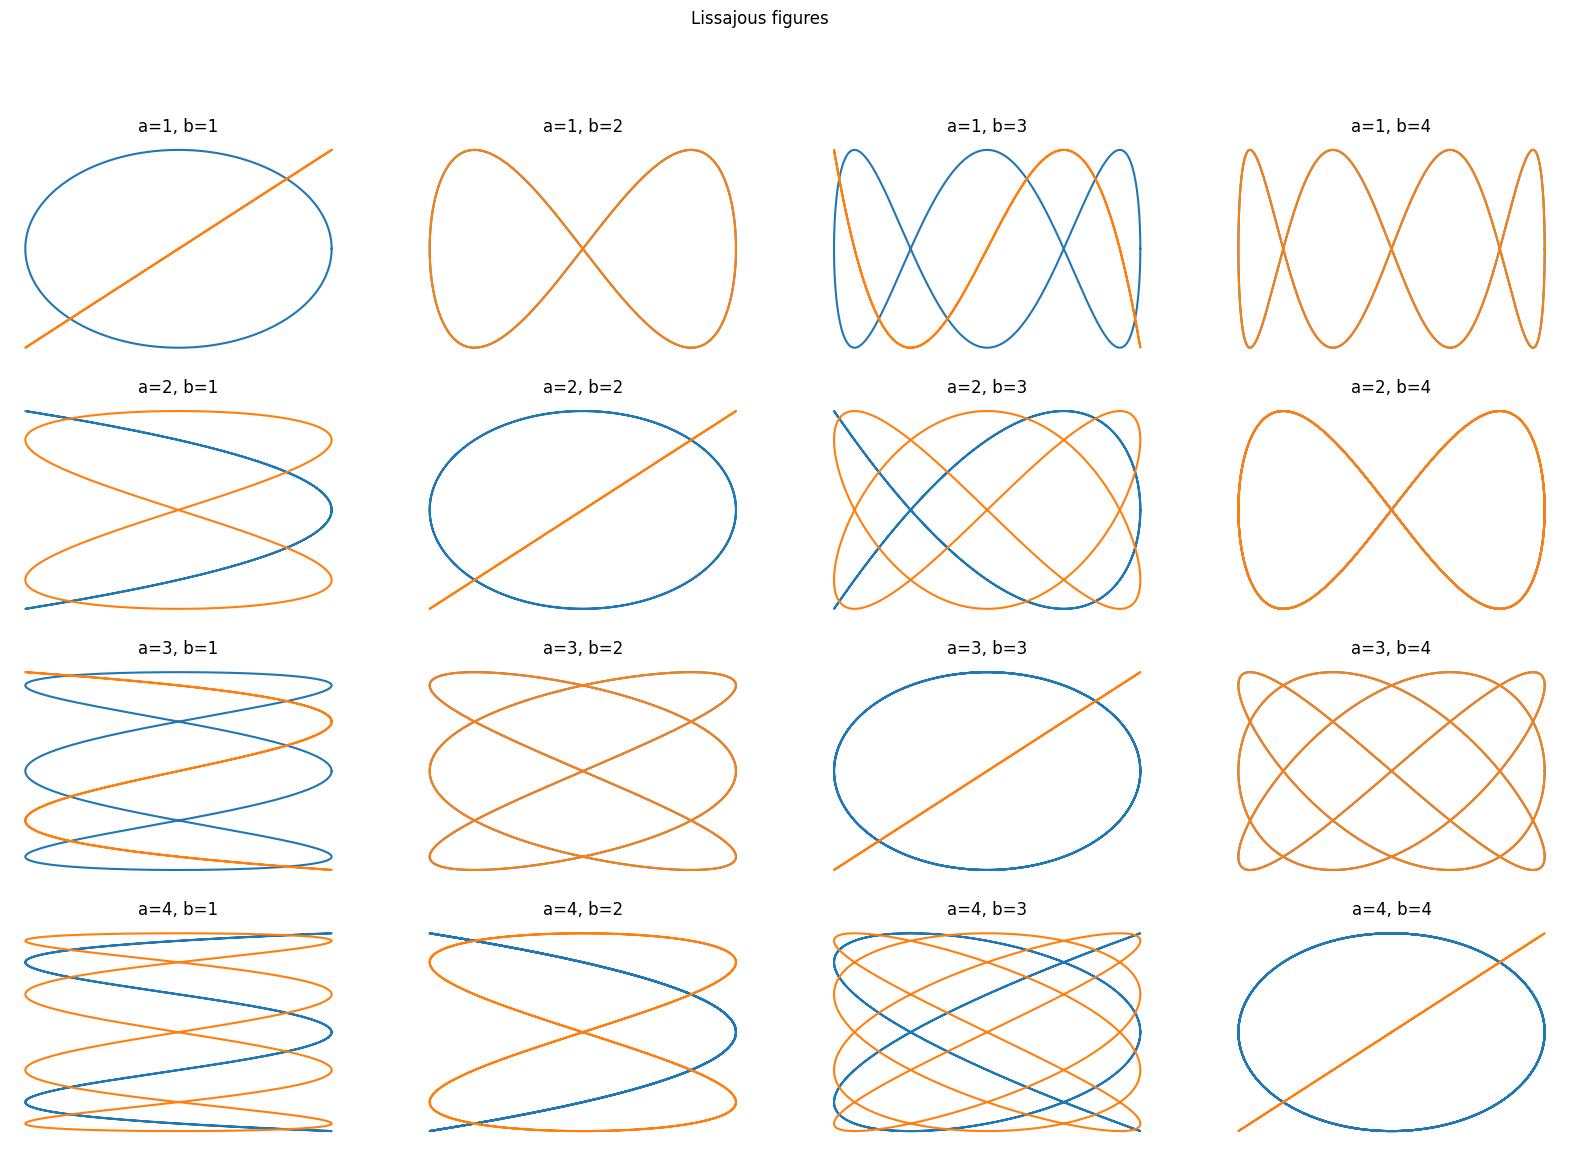

In [ ]:
# Готовим данные
t = np.linspace(0, 2*np.pi, 1000)

# Здесь все как обычно
fig = plt.figure(figsize=(20, 13))
fig.suptitle('Lissajous figures')

nrows = 4
ncols = 4

for a in range(1, nrows + 1):
    for b in range(1, ncols + 1):
        # Выбираем ячейку
        ax = fig.add_subplot(nrows, ncols, (a - 1) * ncols + b)
        # Рисуем кривую Лиссажу
        ax.plot(
            np.cos(a*t),
            np.sin(b*t),
        )
        ax.plot(
            np.sin(a*t),
            np.sin(b*t),
        )
        # Обираем оси координат (они только засоряют рисунок)
        ax.set_axis_off()
        # Делаем подписи
        ax.set_title(f'a={a}, b={b}')

plt.show()

А теперь, как это удобно делать:

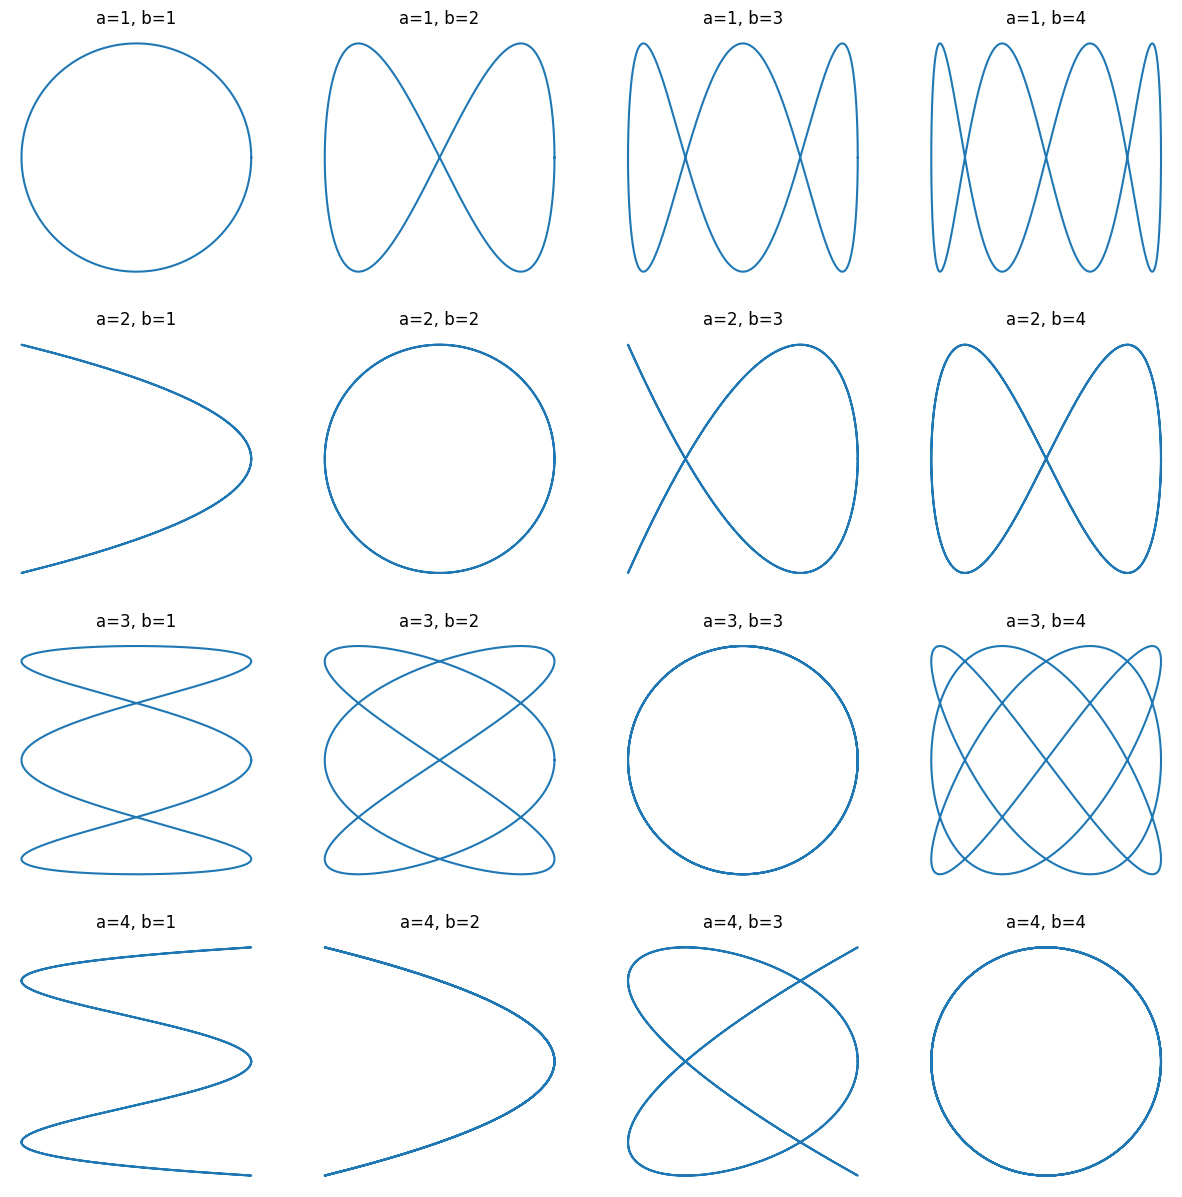

In [ ]:
t = np.linspace(0, 2*np.pi, 1000)

nrows = 4
ncols = 4

figure, axes = plt.subplots(nrows, ncols, figsize=(15,15))

for a in range(nrows):
    for b in range(ncols):
        # Выбираем ячейку
        ax = axes[a][b]
        # Рисуем кривую Лиссажу
        ax.plot(
            np.cos((a+1)*t),
            np.sin((b+1)*t),
        )
        # Обираем оси координат (они только засоряют рисунок)
        ax.set_axis_off()
        # Делаем подписи
        ax.set_title('a={}, b={}'.format(a+1, b+1))

plt.show()

Иногда хочется собрать несколько графиков на одном рисунке, но их размеры должны отличаться. Для этого надо использовать объект GridSpec.

<ipython-input-7-6368e934e126>:24: RuntimeWarning: invalid value encountered in arccosh
  func(points),


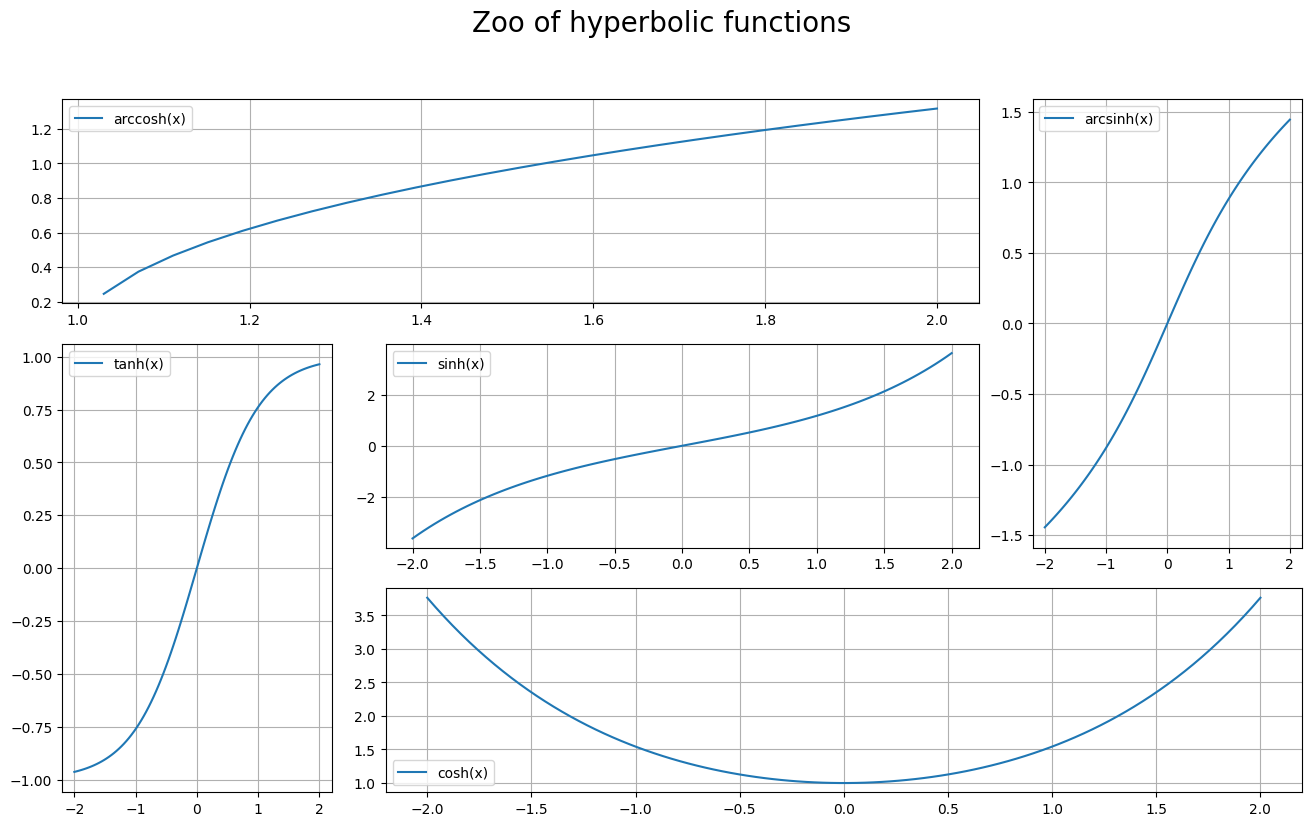

In [ ]:
from matplotlib import gridspec  # GridSpec определен там

# Создаем картинку
fig = plt.figure(figsize=(16, 9))
fig.suptitle('Zoo of hyperbolic functions', fontsize=20)

# Создаем "спеку"
spec = gridspec.GridSpec(nrows=3, ncols=4)
# В метод add_suplot можно передать slicing от спеки.
# Тем самым создастся область рисования занимающая ячейки соответствующие slicing'у
fig.add_subplot(spec[0, :3
                     ])  # Добавить область рисования занимающую первые три ячейки первой строки
fig.add_subplot(spec[:2, 3])
fig.add_subplot(spec[2, 1:])
fig.add_subplot(spec[1:, 0])
fig.add_subplot(spec[1, 1:3])

trig_funcs = [np.sinh, np.tanh, np.cosh, np.arcsinh, np.arccosh]
points = np.linspace(-2, 2, 100)

for ax, func in zip(fig.axes, trig_funcs[::-1]):
    ax.plot(
        points,
        func(points),
        label='{}(x)'.format(func.__name__)
    )
    # Выбрать самое "хорошее" расположение для легенды
    ax.legend(loc='best')
    ax.grid(True)

plt.show()